In [1]:
import numpy as mp

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
sns.set_theme(style='darkgrid')
%matplotlib inline

In [3]:
df = pd.read_csv('gld_price_data.csv')

In [4]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
df.shape

(2290, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [9]:
df.duplicated().sum()

0

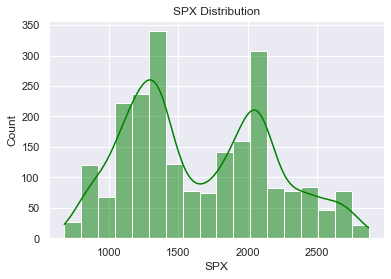

In [10]:
plt.title("SPX Distribution")
sns.histplot(data=df,x='SPX',kde=True,color='green')
plt.show()

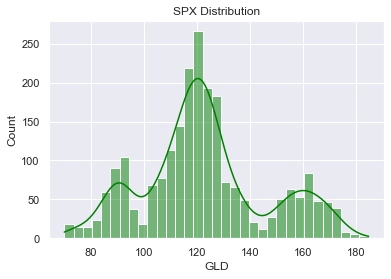

In [11]:
plt.title("SPX Distribution")
sns.histplot(data=df,x='GLD',kde=True,color='green')
plt.show()

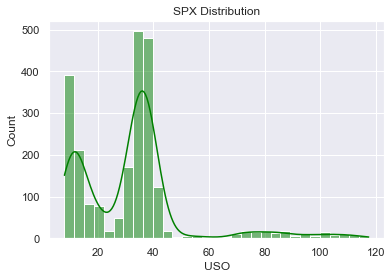

In [12]:
plt.title("SPX Distribution")
sns.histplot(data=df,x='USO',kde=True,color='green')
plt.show()

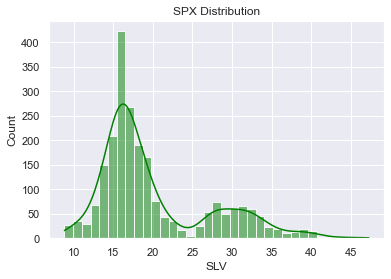

In [13]:
plt.title("SPX Distribution")
sns.histplot(data=df,x='SLV',kde=True,color='green')
plt.show()

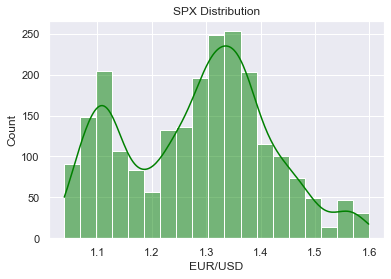

In [14]:
plt.title("SPX Distribution")
sns.histplot(data=df,x='EUR/USD',kde=True,color='green')
plt.show()

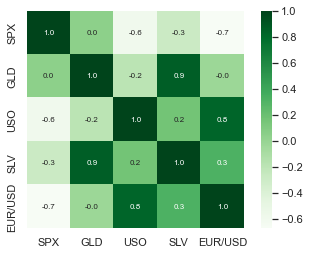

In [15]:
correlation = df.corr()
sns.heatmap(correlation,cbar=True,square=True, fmt='.1f',annot=True,annot_kws={'size':8},cmap='Greens')
plt.show()

In [16]:
correlation['GLD']

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64

In [17]:
X = df.drop(columns=['GLD','Date'],axis=1)
y = df['GLD']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [19]:
model = RandomForestRegressor(n_estimators = 100)

In [20]:
model.fit(X_train,y_train)

RandomForestRegressor()

In [21]:
train_data_predictions = model.predict(X_train)
test_data_predictions = model.predict(X_test)

In [22]:
r2_score(test_data_predictions,y_test)

0.9896649465309422